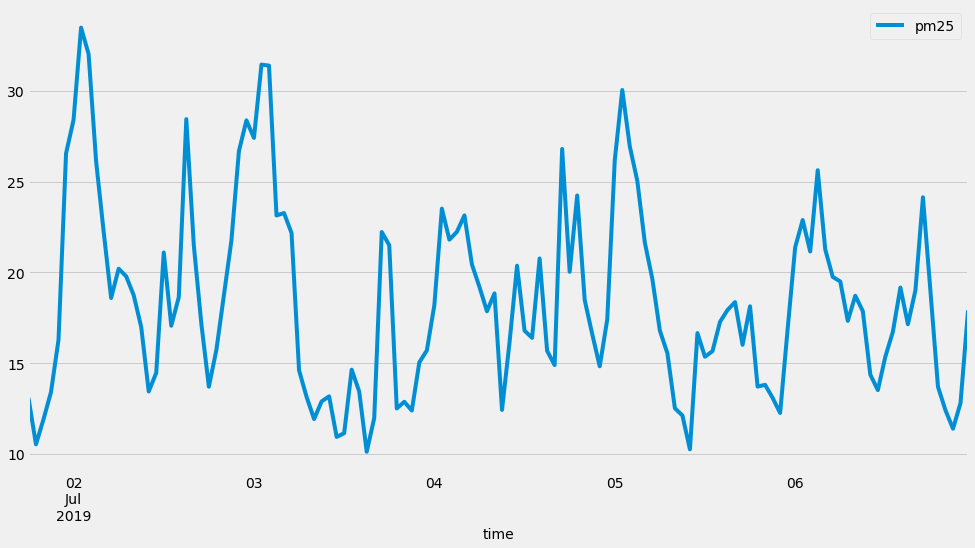

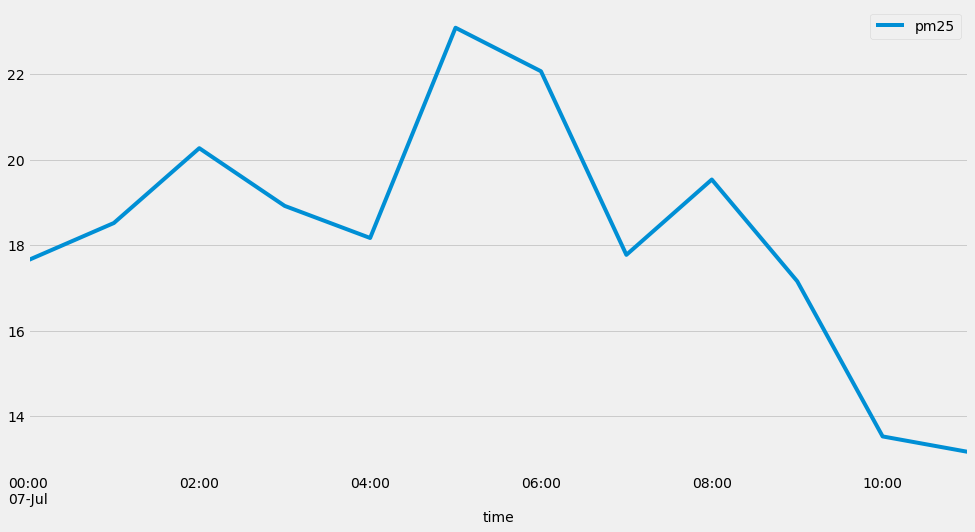

138

In [324]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

df = pd.read_excel("data.xls")



# Data Preprocessing

cols = ['_id', 'battery', 'distance', 'location', 'name', 'source', 'ward_id']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('time')

   
df['time'] = pd.to_datetime(df['time'], unit='ms')


df = df[['time','pm25']]
df.isnull().sum()

test1=df[7500:]
test_xcoord = test1['time'].dt.time.to_numpy()
test_xcoord



#df = df.groupby('time')['pm25'].mean().reset_index()
df = df.set_index('time')
df = df.resample('1H').mean()
df.index



train=df[0:126] 
test=df[126:]




train.plot(figsize=(15,8), fontsize=14)
test.plot(figsize=(15,8), fontsize=14)
plt.show()
test_xcoord
len(df)

In [325]:

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [326]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [327]:

look_back = 2
training_set = train.iloc[:].values
testing_set = test.iloc[:].values
training_set
testing_set
trainX, trainY = create_dataset(training_set, look_back)
testX, testY = create_dataset(testing_set, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 4s - loss: 341.8068
Epoch 2/100
 - 0s - loss: 319.7839
Epoch 3/100
 - 0s - loss: 308.0729
Epoch 4/100
 - 0s - loss: 298.0865
Epoch 5/100
 - 0s - loss: 288.5048
Epoch 6/100
 - 0s - loss: 279.2416
Epoch 7/100
 - 0s - loss: 270.2744
Epoch 8/100
 - 0s - loss: 261.5659
Epoch 9/100
 - 0s - loss: 253.1010
Epoch 10/100
 - 0s - loss: 244.8620
Epoch 11/100
 - 0s - loss: 236.8369
Epoch 12/100
 - 0s - loss: 229.0280
Epoch 13/100
 - 0s - loss: 221.4042
Epoch 14/100
 - 0s - loss: 214.0067
Epoch 15/100
 - 0s - loss: 206.8119
Epoch 16/100
 - 0s - loss: 199.7890
Epoch 17/100
 - 0s - loss: 192.9806
Epoch 18/100
 - 0s - loss: 186.3542
Epoch 19/100
 - 0s - loss: 179.8951
Epoch 20/100
 - 0s - loss: 173.6336
Epoch 21/100
 - 0s - loss: 167.5511
Epoch 22/100
 - 0s - loss: 161.6244
Epoch 23/100
 - 0s - loss: 155.8817
Epoch 24/100
 - 0s - loss: 150.3093
Epoch 25/100
 - 0s - loss: 144.8999
Epoch 26/100
 - 0s - loss: 139.6400
Epoch 27/100
 - 0s - loss: 134.5440
Epoch 28/100
 - 0s - loss: 129.6290
E

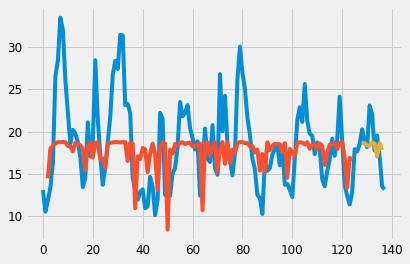

In [328]:

#scaler = MinMaxScaler(feature_range=(0, 1))
#dataset = scaler.fit_transform(df)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])
# calculate root mean squared error
#trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#print('Train Score: %.2f RMSE' % (trainScore))
#testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
#print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict
# plot baseline and predictions
plt.plot((df.values))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [329]:
testPredict, testX

(array([[18.564402],
        [18.669403],
        [18.338528],
        [18.36219 ],
        [18.751945],
        [18.582514],
        [17.054232],
        [18.652231],
        [17.816069]], dtype=float32), array([[[17.65      , 18.51666667]],
 
        [[18.51666667, 20.26666667]],
 
        [[20.26666667, 18.91666667]],
 
        [[18.91666667, 18.16666667]],
 
        [[18.16666667, 23.08333333]],
 
        [[23.08333333, 22.06557377]],
 
        [[22.06557377, 17.77192982]],
 
        [[17.77192982, 19.53333333]],
 
        [[19.53333333, 17.15517241]]]))

In [330]:
from numpy import array

testX
testX1 = []
for i in testX:
    for j in i:
        testX1.append([j[0]])
       
testX1   
testX = array(testX1)

In [332]:

testPredict1 = []
for i in testPredict:
    for j in range(look_back-1):
        
            testPredict1.append(list(i))
        
testPredict = array(testPredict1)        

In [333]:
testX = array(testX)

In [335]:
testX, testPredict

(array([[17.65      ],
        [18.51666667],
        [20.26666667],
        [18.91666667],
        [18.16666667],
        [23.08333333],
        [22.06557377],
        [17.77192982],
        [19.53333333]]), array([[18.564402],
        [18.669403],
        [18.338528],
        [18.36219 ],
        [18.751945],
        [18.582514],
        [17.054232],
        [18.652231],
        [17.816069]], dtype=float32))

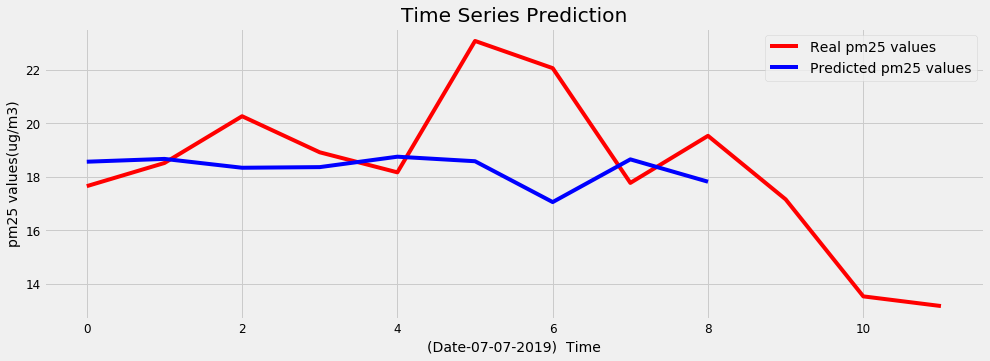

The Mean Squared Error of our forecasts is 6.04


In [338]:
# Visualising the results
plt.figure(figsize=(15,5))
plt.plot(test.values, color = 'red', label = 'Real pm25 values')
plt.plot(testPredict, color = 'blue', label = 'Predicted pm25 values')
plt.title('Time Series Prediction')
plt.xlabel('(Date-07-07-2019)  Time')
plt.ylabel('pm25 values(ug/m3)')
plt.legend()
plt.show()
mse = ((testPredict - testX) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))